#**DACSS 690 Python For Data Science Project**

Project Introduction:

In recent years, the financial market has seen an exponential rise in data-driven decision-making, with predictive analytics playing a vital role in guiding investment strategies. This project aims to delve into the world of stock price analysis and forecasting using historical data, with a focus on understanding trends, seasonal patterns, and the predictive capabilities of advanced time series models.
The project will leverage the yfinance library to fetch historical stock data and perform a comprehensive time series analysis. We will decompose stock prices into trend, seasonality, and residual components to understand the underlying behavior of the time series. Following this analysis, the project will apply various forecasting techniques—ARIMA, Prophet, and LSTM (Long Short-Term Memory Neural Network)—to predict future stock prices.
This exploration not only provides insight into stock price patterns but also evaluates the effectiveness of different forecasting models, helping identify the best approach for stock price prediction. By integrating statistical and machine learning techniques, this project offers a balanced approach to time series analysis, contributing valuable perspectives on predictive modeling in finance.
Data Source : https://finance.yahoo.com/


#**Literature Review**

1. Stock Price (Close, Adjusted Close)

* Stock prices represent the market value of a company's shares. The closing price is the most common indicator used in technical analysis, and the adjusted closing price accounts for stock splits, dividends, and other corporate actions.

* Closing Price:
    Closing price is a primary indicator for traders and analysts, reflecting the most recent consensus on a stock's value at the market close. It is considered a significant measure of the stock's trend.

* Adjusted Close: The adjusted close provides a more accurate representation of a stock's value over time, factoring in dividends and corporate actions.

2. Opening Price

* The opening price is the first traded price of a stock after the market opens. It can be an indicator of market sentiment or investor perception at the start of the trading day.


3. High and Low Prices

* The high and low prices represent the range of trading activity during a given trading day.



4. Volume

* Volume refers to the number of shares traded within a specific time frame. It plays a key role in technical analysis, providing information about the strength of a price move.



5. Time and Date

* Time and date in stock data refer to the exact timestamp of each price movement, which helps analysts examine market behavior over specific periods.




In [ ]:
! pip install yfinance pandas statsmodels matplotlib seaborn prophet tensorflow
!pip install mplfinance

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


Alright, so here’s the deal – we’re grabbing historical stock data for four big players: Apple (AAPL), Microsoft (MSFT), Google (GOOGL), and Amazon (AMZN). The idea is to fetch their stock prices and other related metrics (like high, low, volume, etc.) for the time frame between March 7, 2022, and May 9, 2023. This chunk of code uses the yfinance library to automate that process and store the data neatly in a dictionary, where each ticker gets its own DataFrame.

The goal? To have all the raw stock data in one place, so we can start analyzing trends, performing feature engineering, and eventually building some cool machine learning models.

In [ ]:
# Define tickers and a dictionary to store data
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
stock_data_dict = {}

# Fetch historical stock data
for ticker in tickers:
    stock_data_dict[ticker] = yf.download(ticker, start="2022-03-07", end="2023-05-09")
    print(f"Downloaded data for {ticker}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Downloaded data for AAPL
Downloaded data for MSFT
Downloaded data for GOOGL
Downloaded data for AMZN


##Here's the follow-up to our data-fetching mission. This code loops through the stock_data_dict dictionary and does two things for each stock ticker:

* Prints out a summary (info()) of the DataFrame – this gives us the lowdown on column names, data types, and whether we have any missing values.

* Prints the first few rows of the data (head()) – just to get a quick peek at what the data actually looks like.

* The idea is to double-check that our stock data for Apple, Microsoft, Google, and Amazon was fetched correctly and is ready for some serious number-crunching. Think of this step as your data "quality control."

In [ ]:
for ticker in stock_data_dict:
    print(f"Data for {ticker}:")
    print(stock_data_dict[ticker].info())
    print(stock_data_dict[ticker].head())


Data for AAPL:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 295 entries, 2022-03-07 to 2023-05-08
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  295 non-null    float64
 1   (Close, AAPL)      295 non-null    float64
 2   (High, AAPL)       295 non-null    float64
 3   (Low, AAPL)        295 non-null    float64
 4   (Open, AAPL)       295 non-null    float64
 5   (Volume, AAPL)     295 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 16.1 KB
None
Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2022-03-07  156.932297  159.300003  165.020004  159.039993  163.360001   
2022-03-08  155.099945  157.440002  162.880005  155.800003  158.820007   
2022-03-09  160.528030  162.949997  163.410004  159.

In [ ]:
# Re-download the data
for ticker in tickers:
    stock_data_dict[ticker] = yf.download(ticker, start="2022-03-07", end="2023-05-09")
    print(f"Data for {ticker} downloaded successfully!")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data for AAPL downloaded successfully!
Data for MSFT downloaded successfully!
Data for GOOGL downloaded successfully!


[*********************100%***********************]  1 of 1 completed


Data for AMZN downloaded successfully!


In [ ]:
for ticker in stock_data_dict:
    stock_data_dict[ticker].columns = stock_data_dict[ticker].columns.map(lambda x: x if isinstance(x, str) else x[0])


##**Context:**

Time to play detective and hunt for missing data! This code checks each stock's dataset (AAPL, MSFT, GOOGL, AMZN) for any missing values. It does this by:

Looping through our stock_data_dict.
Printing the number of missing values (isnull().sum()) for each column in the DataFrame.
Why does this matter? Missing values can totally mess up our calculations and machine learning models, so we need to know where they are. If we find any, we’ll either fill them in (forward/backward fill) or drop those rows, depending on the situation. This step is all about keeping our data squeaky clean and ready for analysis!

In [ ]:
for ticker in stock_data_dict:
    print(f"Missing values in {ticker}:")
    print(stock_data_dict[ticker].isnull().sum())


Missing values in AAPL:
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64
Missing values in MSFT:
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64
Missing values in GOOGL:
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64
Missing values in AMZN:
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [ ]:
for ticker in stock_data_dict:
    stock_data_dict[ticker] = stock_data_dict[ticker].fillna(method='ffill').fillna(method='bfill')


<ipython-input-40-940988cfbd8f>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data_dict[ticker] = stock_data_dict[ticker].fillna(method='ffill').fillna(method='bfill')


We again for good measure look into the missing values after cleaning to make sure it does not affect our models in the future

In [ ]:
# Check for missing values
for ticker in stock_data_dict:
    print(f"Missing values for {ticker}:")
    print(stock_data_dict[ticker].isnull().sum())


Missing values for AAPL:
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64
Missing values for MSFT:
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64
Missing values for GOOGL:
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64
Missing values for AMZN:
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


This one's all about spotting the oddballs in our data – the outliers.
 Using boxplots for each ticker (AAPL, MSFT, GOOGL, AMZN), we’re visualizing the distribution of their closing prices to identify any unusually high or low values that don’t fit the overall trend.

Here’s what’s happening:

* We loop through stock_data_dict and grab the Close column for each stock.

* The boxplot shows the spread of the closing prices, with whiskers capturing most of the data and dots (if any) representing outliers.

* The horizontal orientation makes it easier to compare the outliers' values.
Why care about outliers? They can skew our models and analysis.

* After this step, we’ll decide whether to keep them (if they’re valid) or remove them (if they’re errors or anomalies).

* This is a key part of ensuring the reliability of our insights!

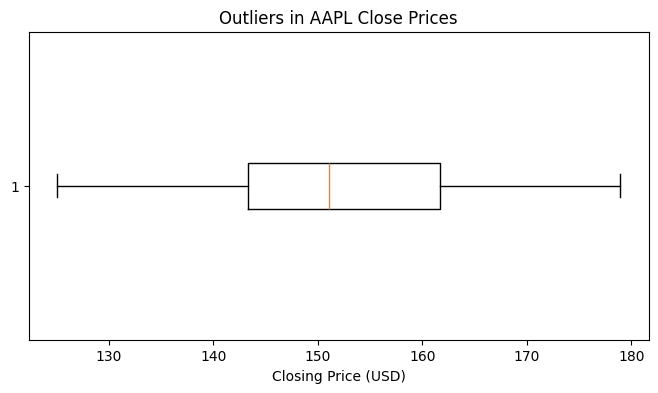

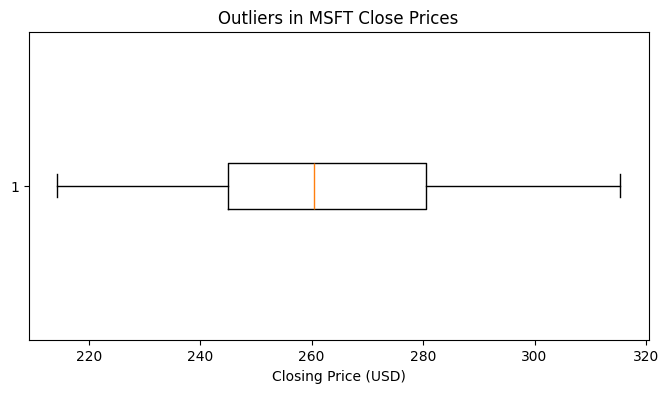

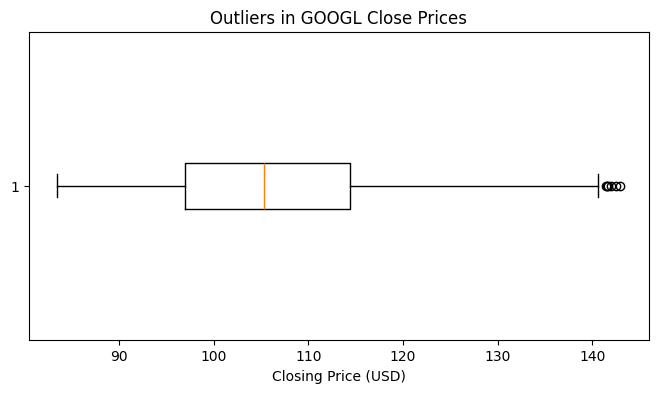

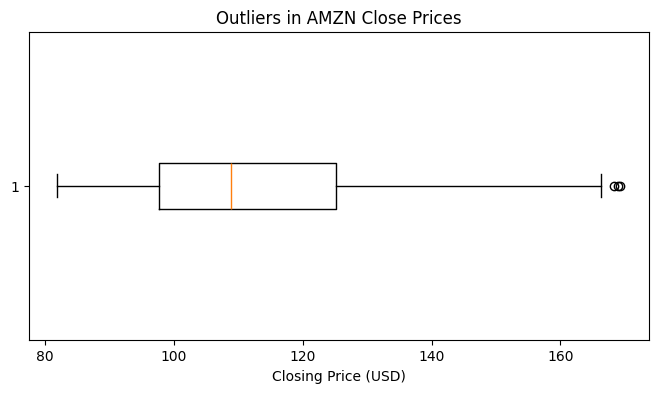

In [ ]:
import matplotlib.pyplot as plt

# Plot boxplots to check for outliers
for ticker in stock_data_dict:
    plt.figure(figsize=(8, 4))
    plt.boxplot(stock_data_dict[ticker]['Close'].dropna(), vert=False)
    plt.title(f"Outliers in {ticker} Close Prices")
    plt.xlabel("Closing Price (USD)")
    plt.show()


Interpretation of Boxplots

1. Outliers in GOOGL Close Prices

Main Insight: Most of Google's (GOOGL) closing prices are concentrated between approximately 90 and $130, as shown by the interquartile range (IQR) of the boxplot.

Outliers: We can see several closing prices above $130 that are identified as outliers.

These are points that fall beyond the upper whisker (approximately $140).
Such high closing prices may have occurred due to market events, earnings announcements, or sector-wide rallies.

Next Step:
Decide whether to retain or remove these outliers based on their context.
If they are valid events, they can be left in. Otherwise, they might need to be excluded to prevent skewing the analysis.

In [ ]:
for ticker in stock_data_dict:
    Q1 = stock_data_dict[ticker]['Close'].quantile(0.25)
    Q3 = stock_data_dict[ticker]['Close'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    stock_data_dict[ticker] = stock_data_dict[ticker][(stock_data_dict[ticker]['Close'] >= lower_bound) &
                                                      (stock_data_dict[ticker]['Close'] <= upper_bound)]


In [ ]:
for ticker in stock_data_dict:
    stock_data_dict[ticker]['Close'] = stock_data_dict[ticker]['Close'].ffill().bfill()


This code is a crucial step in data cleaning

it ensures that any missing values in the Close column are handled effectively.

Here’s what it does:

* Forward-Fill (ffill): If a value is missing, it fills it with the last valid value from above in the column.
* Backward-Fill (bfill): If the missing value is still not filled (e.g., at the start of the dataset), it uses the next valid value below it in the column.
By combining ffill and bfill, this ensures that the Close column in each stock's DataFrame (AAPL, MSFT, GOOGL, AMZN) has no gaps.
* This is especially important because missing values could break subsequent calulations (like moving averages, returns, etc.) or disrupt machine learning models.

In [ ]:
for ticker in stock_data_dict:
    stock_data_dict[ticker]['7_day_MA'] = stock_data_dict[ticker]['Close'].rolling(window=7).mean()


In [ ]:
for ticker in stock_data_dict:
    print(f"7-day moving average for {ticker}:")
    print(stock_data_dict[ticker][['Close', '7_day_MA']].head(10))


7-day moving average for AAPL:
                 Close    7_day_MA
Date                              
2022-03-07  159.300003         NaN
2022-03-08  157.440002         NaN
2022-03-09  162.949997         NaN
2022-03-10  158.520004         NaN
2022-03-11  154.729996         NaN
2022-03-14  150.619995         NaN
2022-03-15  155.089996  156.949999
2022-03-16  159.589996  156.991427
2022-03-17  160.619995  157.445711
2022-03-18  163.979996  157.592854
7-day moving average for MSFT:
                 Close    7_day_MA
Date                              
2022-03-07  278.910004         NaN
2022-03-08  275.850006         NaN
2022-03-09  288.500000         NaN
2022-03-10  285.589996         NaN
2022-03-11  280.070007         NaN
2022-03-14  276.440002         NaN
2022-03-15  287.149994  281.787144
2022-03-16  294.390015  283.998574
2022-03-17  295.220001  286.765717
2022-03-18  300.429993  288.470001
7-day moving average for GOOGL:
                 Close    7_day_MA
Date                           

Context:

This code creates a combined line plot to visualize and compare the closing prices of the four major companies: Apple (AAPL), Microsoft (MSFT), Google (GOOGL), and Amazon (AMZN) over time.


What This Visualization Does:

Comparison Across Time:

* By plotting all four companies on the same graph, it allows us to compare their trends and identify similarities or divergences in stock price movements.

Key Features:

Title:

* Clearly states that the plot shows the closing prices of the top 4 companies.

Legend:

* Helps distinguish between the lines corresponding to different companies.

Grid:

* Adds clarity to the chart, making it easier to interpret the values.
Focus on Insights:

* Are there periods when all stocks move together (indicating market-wide trends)?
* Are there spikes or dips unique to specific companies (indicating company-specific events)?

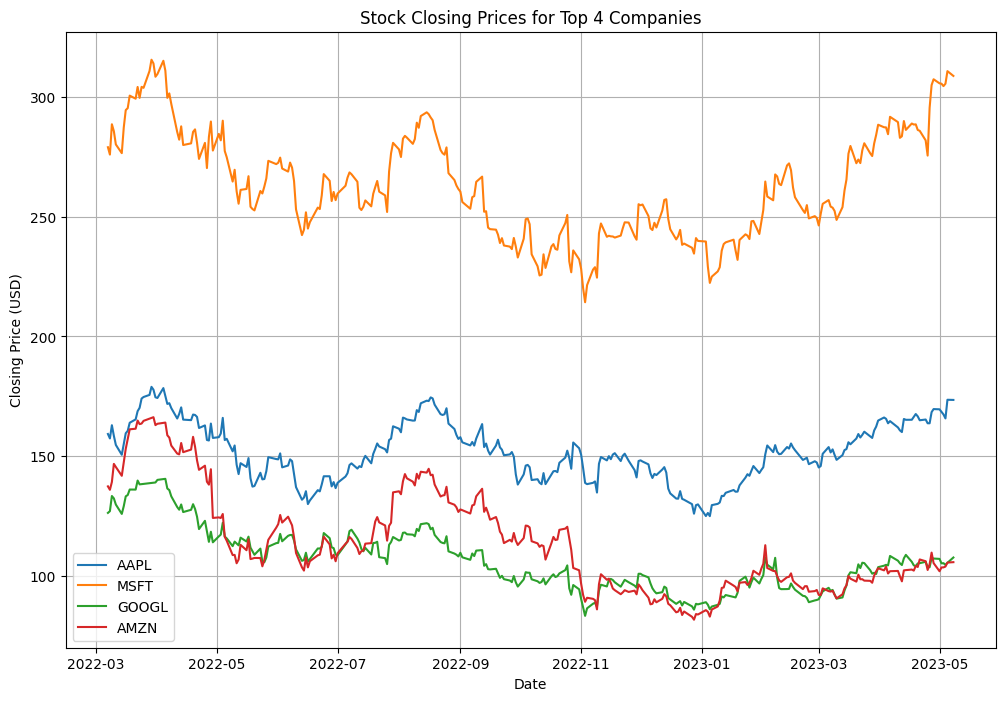

In [ ]:
plt.figure(figsize=(12, 8))

for ticker in tickers:
    plt.plot(stock_data_dict[ticker]['Close'], label=ticker)

plt.title("Stock Closing Prices for Top 4 Companies")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid()
plt.show()

Interpretation of the Plot:
This line plot showcases the closing prices for the top 4 companies—Apple (AAPL), Microsoft (MSFT), Google (GOOGL), and Amazon (AMZN)—over the time period from March 2022 to May 2023. Here are some key takeaways:

1. General Trends Across Companies

MSFT (Orange):

Clearly the highest-priced stock throughout the observed period, with closing prices ranging roughly between 250 and $320.

Noticeable dips around mid-2022 and a steady recovery starting late 2022 into 2023.

AAPL (Blue):

Shows consistent upward growth over time, with prices starting around 150 and ending above $170.

Apple appears to have had less volatility compared to other stocks.
GOOGL (Red):

Exhibits a fairly stable trend with prices fluctuating between 90 and $120.

There’s no dramatic increase or decrease, reflecting consistent performance during this period.

AMZN (Green):

Similar to Google, with prices in the range of 80 to $120.
A small spike occurs in early 2023, possibly indicating a significant event or market reaction.

2. Volatility

Microsoft shows the largest price swings, suggesting higher volatility.
Amazon and Google, on the other hand, appear to have more stable price movements, with their fluctuations staying within smaller ranges.

3. Divergences and Correlations

The trends for AAPL and MSFT appear to follow a somewhat similar upward trajectory in early 2023, hinting at potential sector-wide growth.
GOOGL and AMZN, however, show flatter trends, suggesting they might be less sensitive to overall market conditions during this period.
Insights for Further Analysis
Sector-Wide Movements:
Investigate what might have driven the noticeable price recovery for MSFT, AAPL, and AMZN around the start of 2023.
Look into market events, such as earnings releases, product announcements, or macroeconomic factors.
Correlations:
Quantify correlations between the stock prices using a correlation matrix to confirm any relationships observed in the plot.
Performance Metrics:
Compare the percentage returns or calculate annualized returns for these companies to measure relative performance.
Forecasting:
Build time-series models  to predict the future stock prices based on these trends.

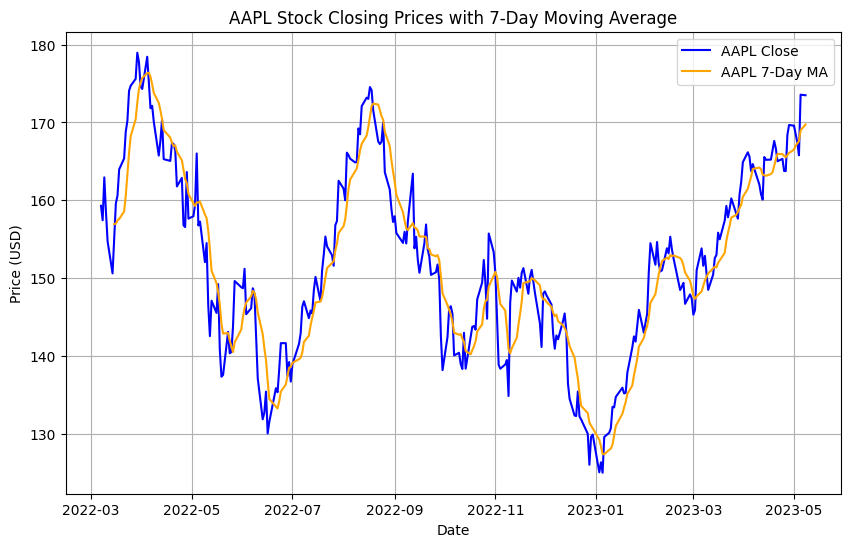

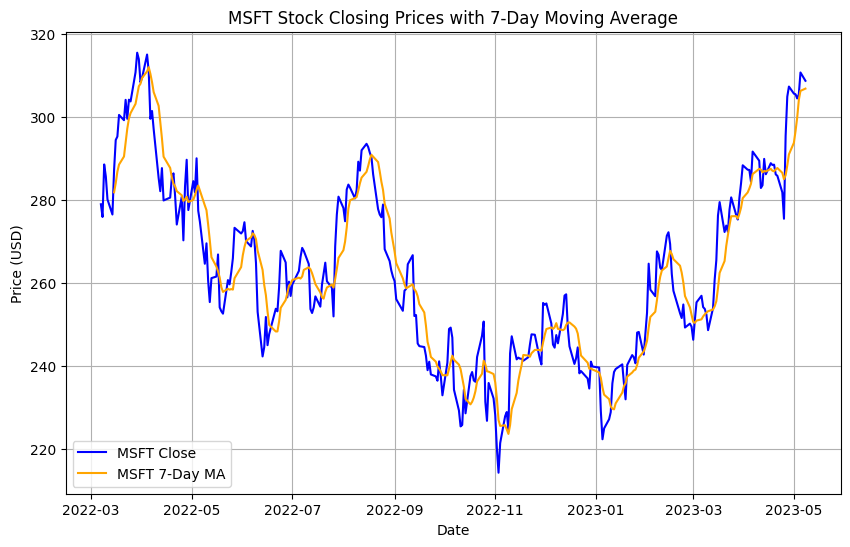

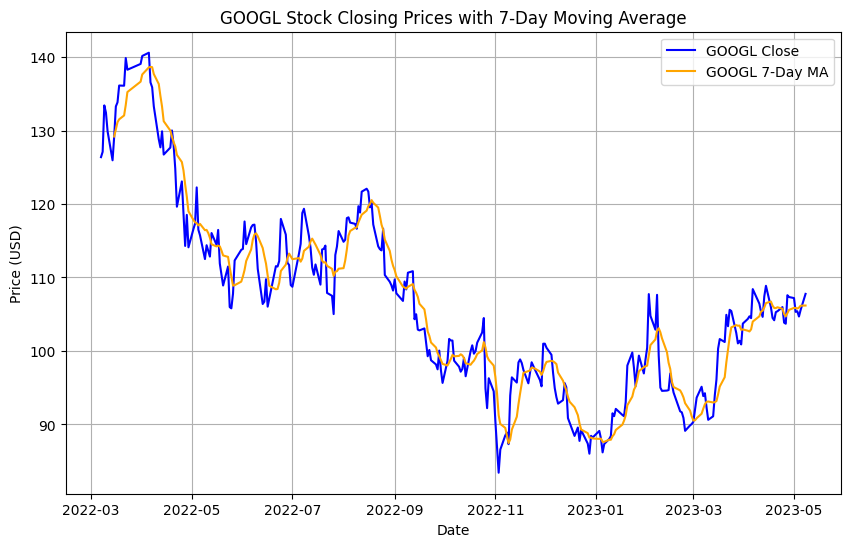

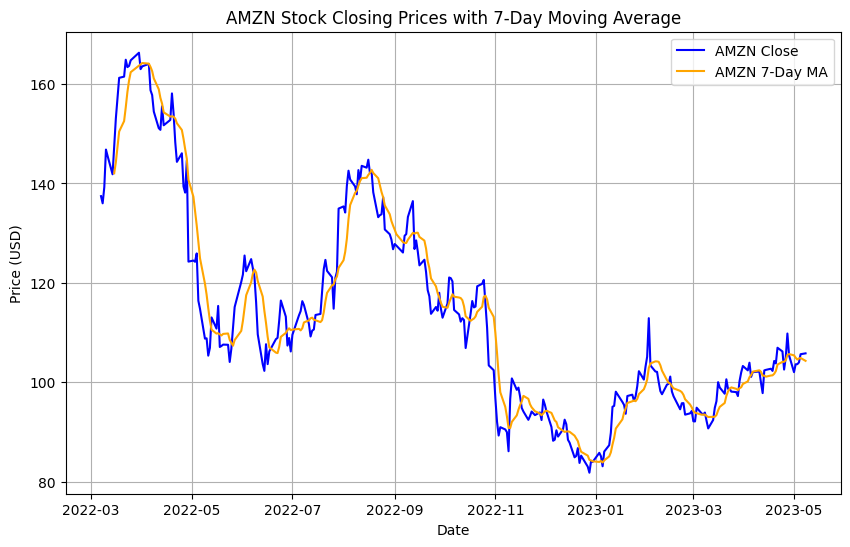

In [ ]:
for ticker in stock_data_dict:
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data_dict[ticker]['Close'], label=f"{ticker} Close", color='blue')
    plt.plot(stock_data_dict[ticker]['7_day_MA'], label=f"{ticker} 7-Day MA", color='orange')
    plt.title(f"{ticker} Stock Closing Prices with 7-Day Moving Average")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid()
    plt.show()


* AAPL (Apple): The 7-day moving average closely tracks the volatile upward and downward trends, reflecting strong seasonality and a steady rise in early 2023.

* MSFT (Microsoft): The moving average smooths out fluctuations, showing a significant recovery in early 2023 after a steep dip in mid-2022.

* GOOGL (Google): A clear downward trend dominates 2022, with stabilization and modest recovery in early 2023 as highlighted by the moving average.

* AMZN (Amazon): After a sharp decline in 2022, the 7-day moving average reflects stabilization and slight upward movement in early 2023.

#Additional Plots

# **1. Daily Returns**
Compute and plot daily returns to visualize stock volatility.

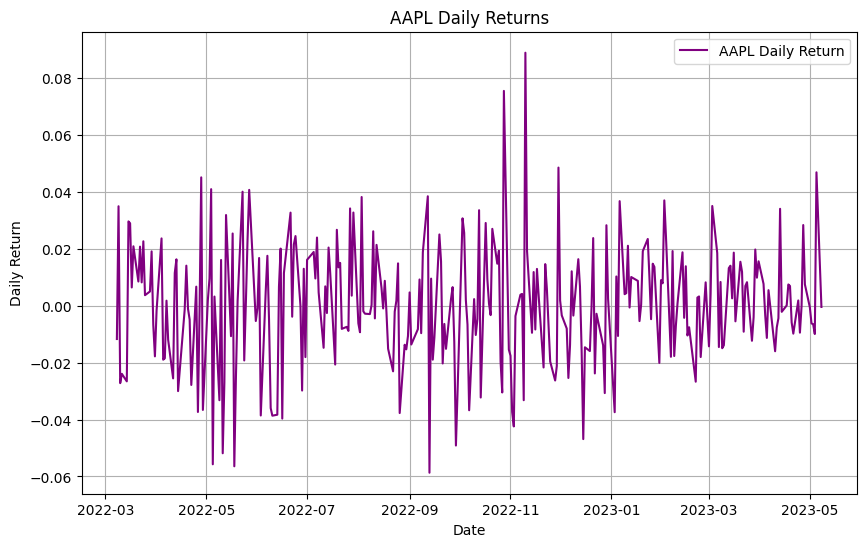

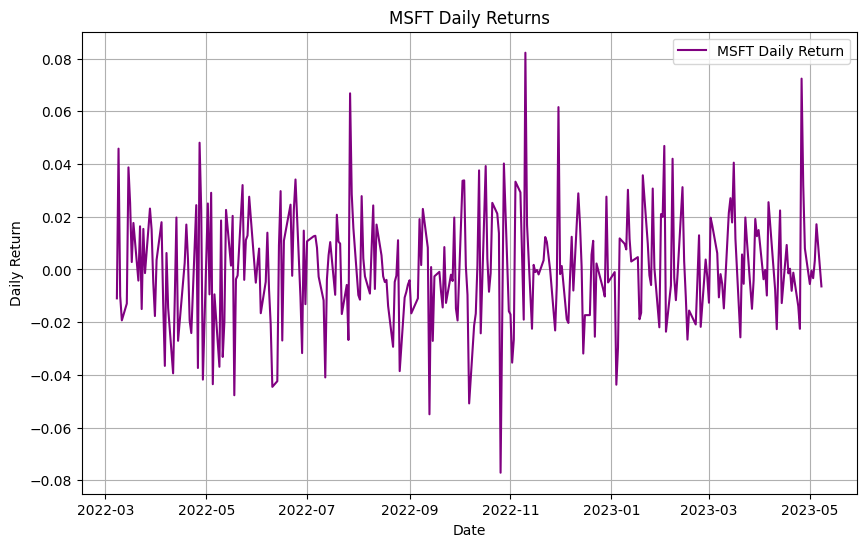

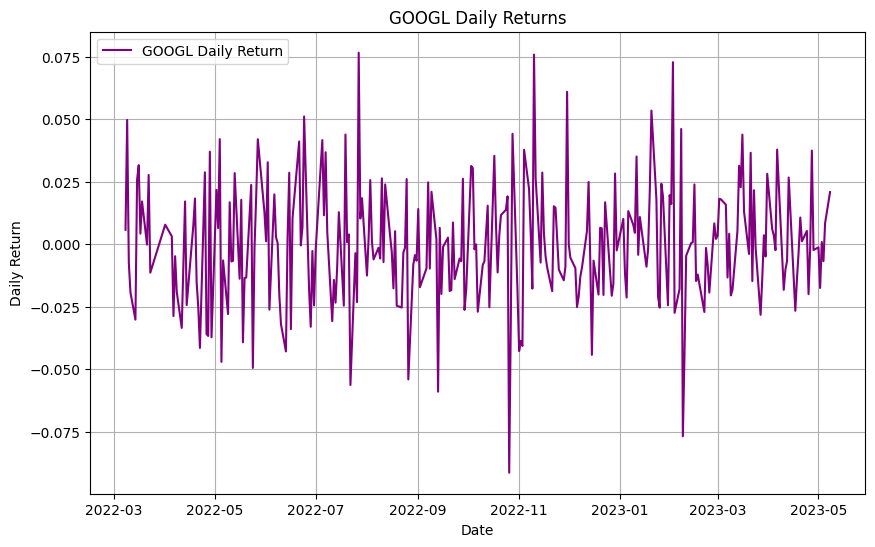

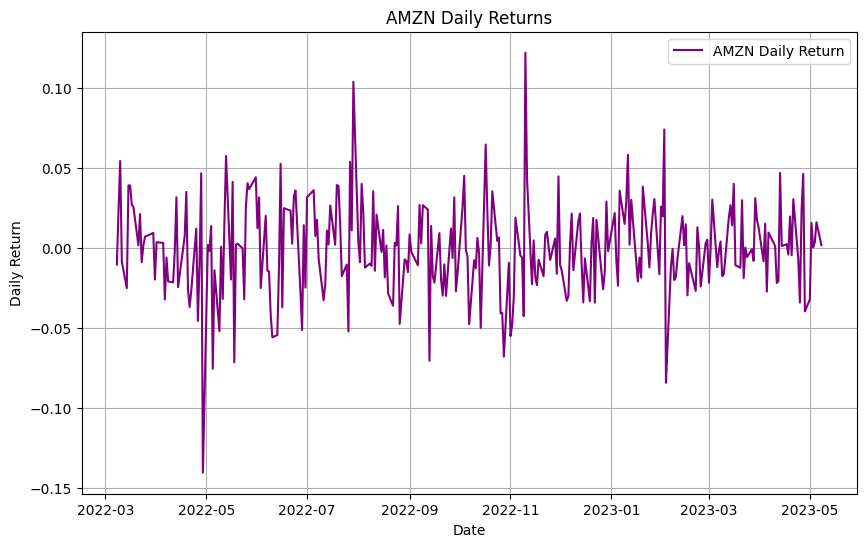

In [ ]:
for ticker in stock_data_dict:
    stock_data_dict[ticker]['Daily_Return'] = stock_data_dict[ticker]['Close'].pct_change()
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data_dict[ticker]['Daily_Return'], label=f"{ticker} Daily Return", color='purple')
    plt.title(f"{ticker} Daily Returns")
    plt.xlabel("Date")
    plt.ylabel("Daily Return")
    plt.legend()
    plt.grid()
    plt.show()


* AAPL (Apple): Apple’s daily returns are mostly stable but show occasional spikes and dips, particularly in late 2022, indicating moderate volatility.

* MSFT (Microsoft): Microsoft’s daily returns reflect higher volatility with noticeable peaks and troughs, especially around mid to late 2022.

* GOOGL (Google): Google’s daily returns are relatively consistent with fewer extreme spikes, indicating steadier stock performance.

* AMZN (Amazon): Amazon exhibits the highest volatility with significant upward and downward spikes, particularly in mid-2022 and late 2022, highlighting more erratic price changes.

# **2.Distribution of Closing Prices**

Create a histogram to show the distribution of closing prices for each company.

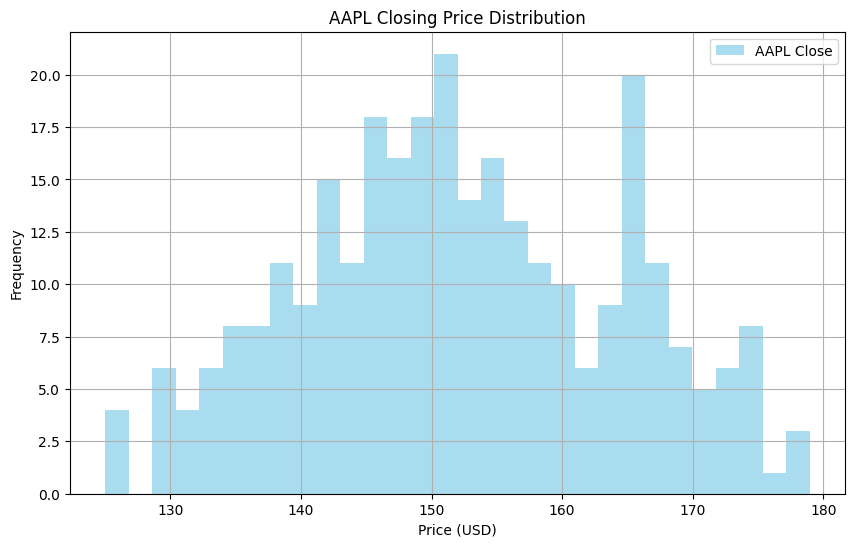

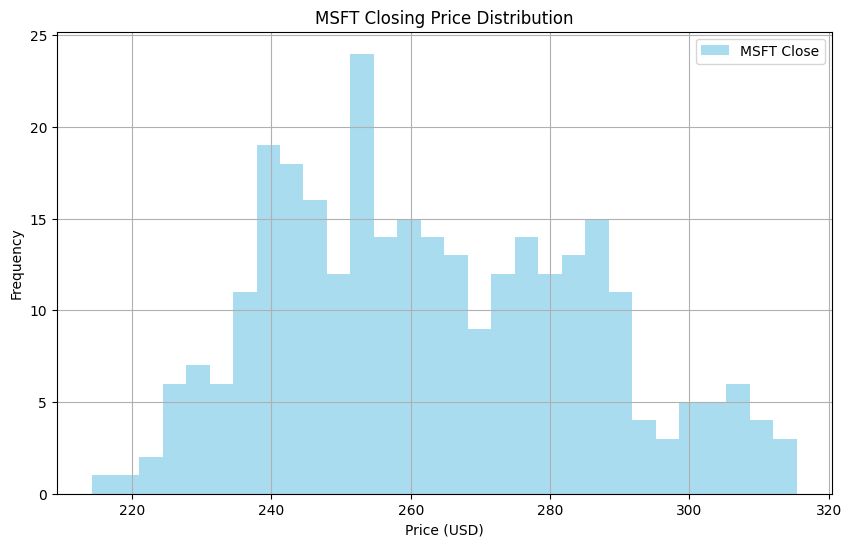

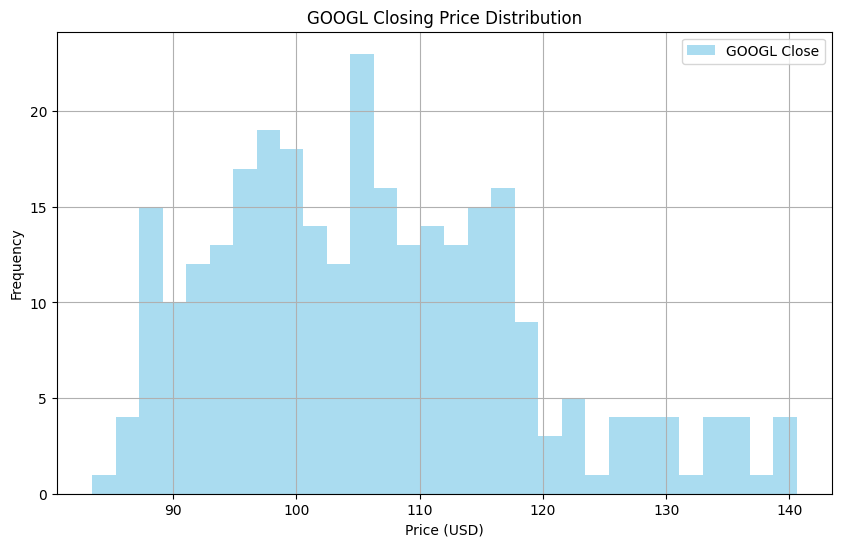

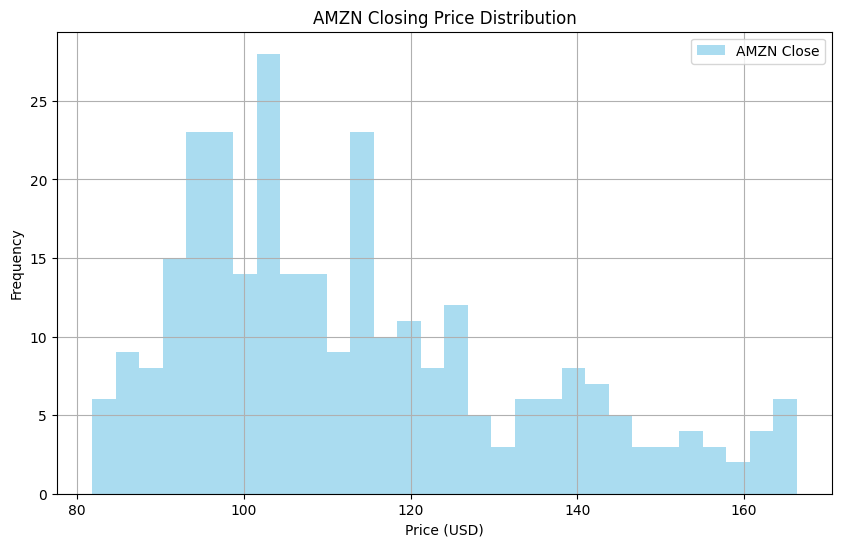

In [ ]:
for ticker in stock_data_dict:
    plt.figure(figsize=(10, 6))
    plt.hist(stock_data_dict[ticker]['Close'], bins=30, alpha=0.7, label=f"{ticker} Close", color='skyblue')
    plt.title(f"{ticker} Closing Price Distribution")
    plt.xlabel("Price (USD)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid()
    plt.show()


AAPL (Apple): The distribution shows a concentration of closing prices between 140 and $160, indicating a stable price range with limited extremes.

MSFT (Microsoft): Most closing prices fall between 240 and $280, reflecting a broader and slightly higher price range compared to Apple.

GOOGL (Google): Google's closing prices are heavily clustered between 100 and $120, suggesting a relatively narrow and consistent trading range.

AMZN (Amazon): Amazon's prices are primarily distributed between 100 and $140, with a noticeable peak around 100 Dollars , indicating a slight skew toward the lower end of the range.







# **Candlestick Chart**

It is just a better way of pllotting the Price realised data


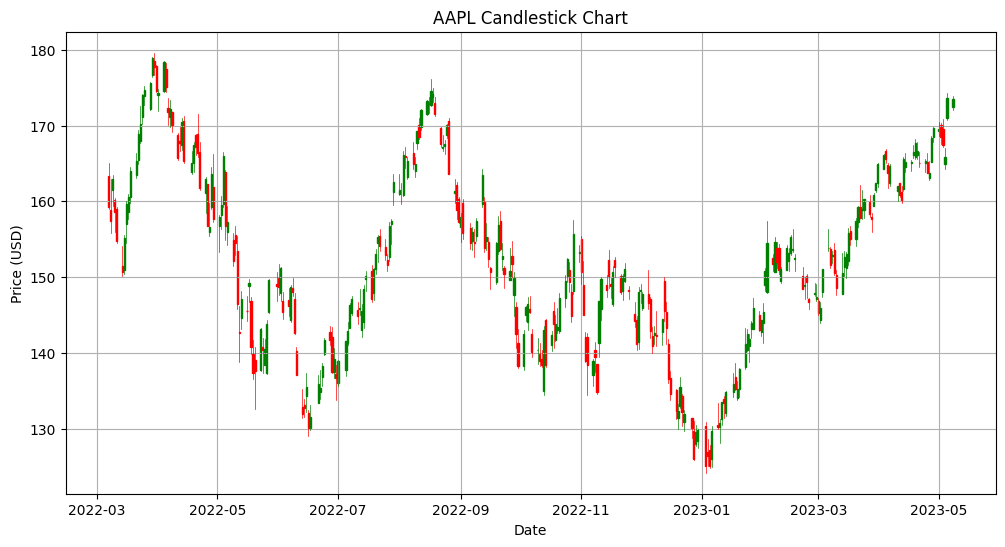

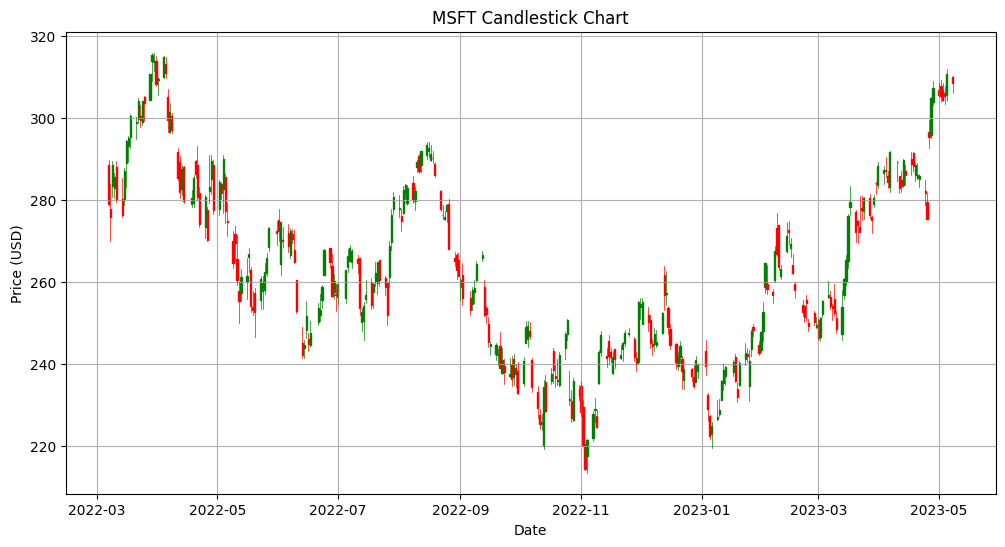

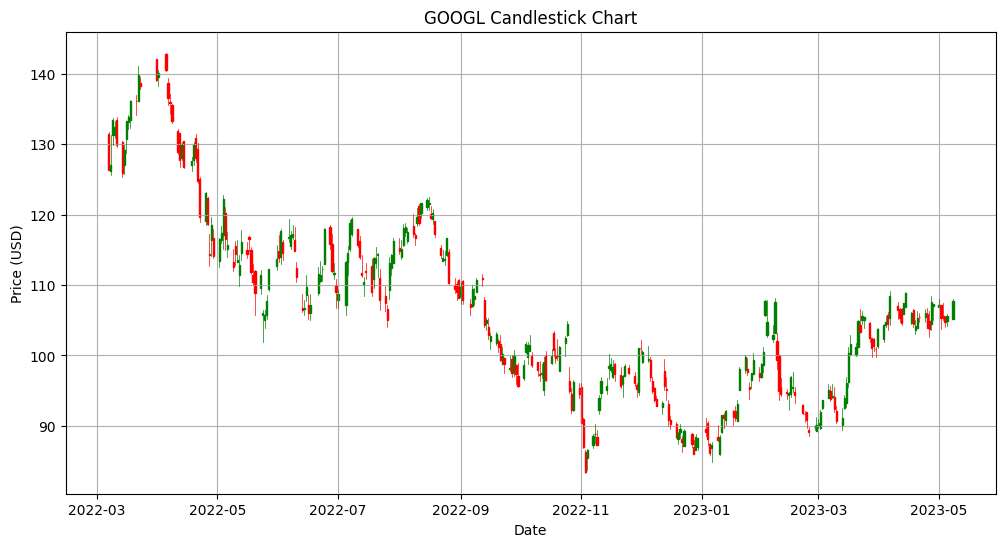

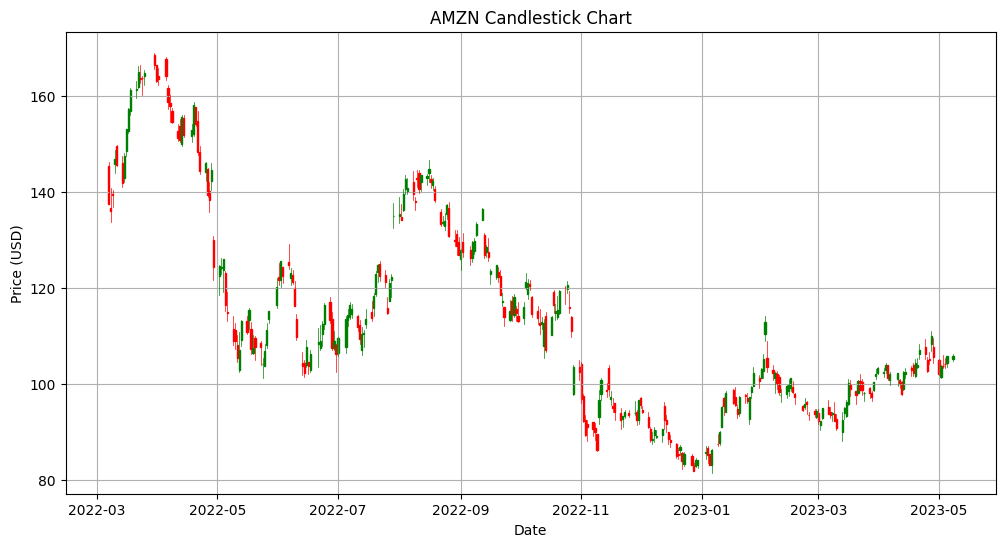

In [ ]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

for ticker in stock_data_dict:
    # Prepare data for candlestick chart
    ohlc = stock_data_dict[ticker].reset_index()[['Date', 'Open', 'High', 'Low', 'Close']]
    ohlc['Date'] = ohlc['Date'].map(mdates.date2num)

    plt.figure(figsize=(12, 6))
    ax = plt.subplot()
    ax.xaxis_date()
    candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red')
    plt.title(f"{ticker} Candlestick Chart")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.grid()
    plt.show()




#**4. Rolling Standard Deviation**

Analyze the rolling standard deviation to observe periods of high volatility.

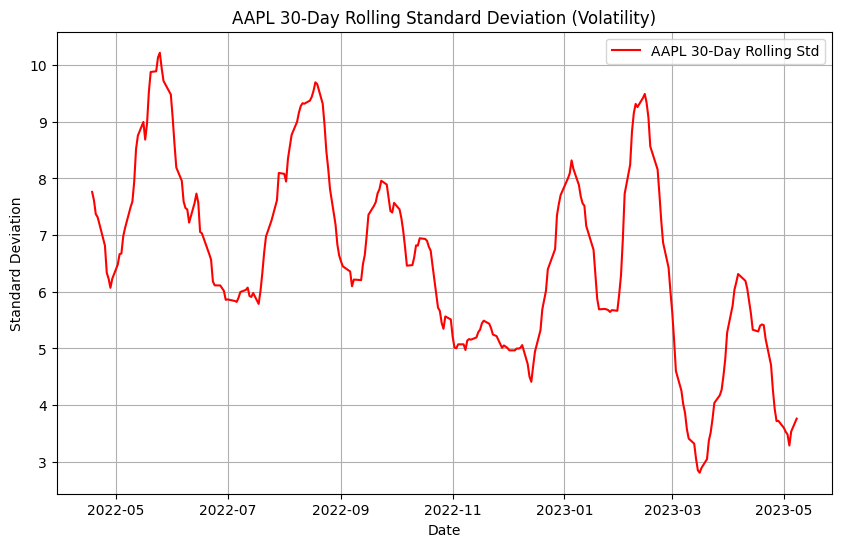

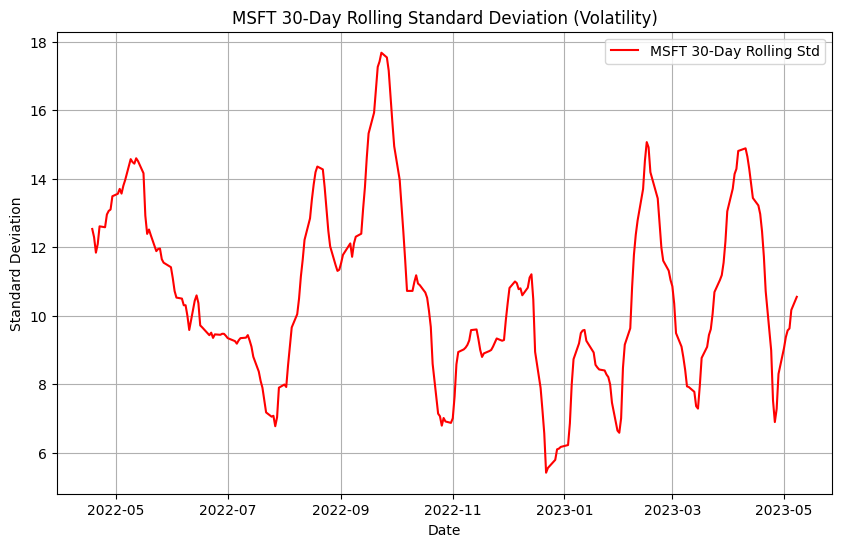

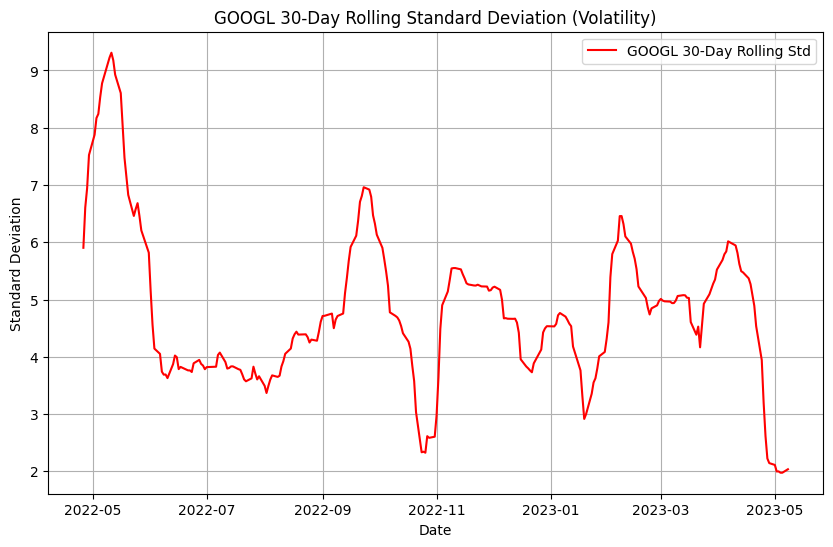

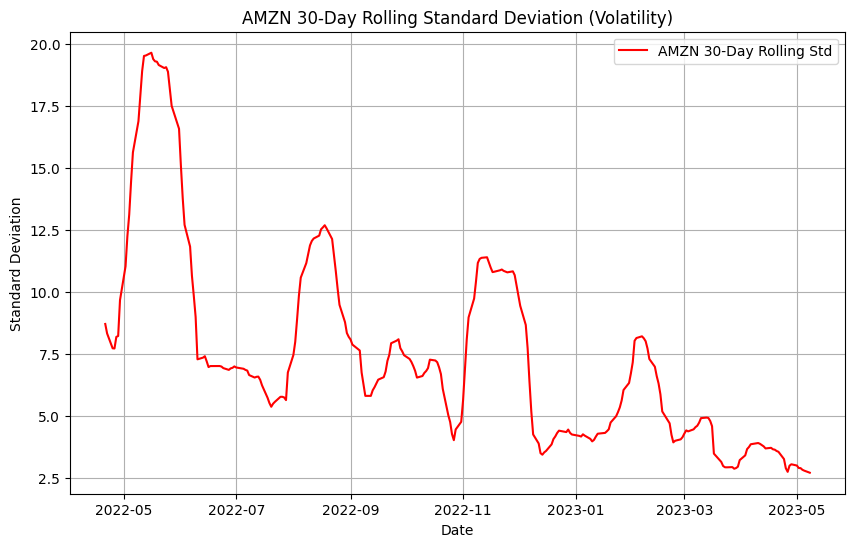

In [ ]:
for ticker in stock_data_dict:
    stock_data_dict[ticker]['Rolling_Std'] = stock_data_dict[ticker]['Close'].rolling(window=30).std()
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data_dict[ticker]['Rolling_Std'], label=f"{ticker} 30-Day Rolling Std", color='red')
    plt.title(f"{ticker} 30-Day Rolling Standard Deviation (Volatility)")
    plt.xlabel("Date")
    plt.ylabel("Standard Deviation")
    plt.legend()
    plt.grid()
    plt.show()


* AAPL (Apple): Volatility peaked in mid-2022 and early 2023, but it has stabilized significantly in recent months.

* MSFT (Microsoft): Microsoft shows high spikes in volatility during mid-2022 and early 2023, reflecting periods of market uncertainty or major events.

* GOOGL (Google): Volatility decreased steadily after mid-2022, with occasional spikes, but it remained relatively low compared to other stocks.

* AMZN (Amazon): Amazon exhibited extreme volatility in early 2022, which has tapered off significantly by 2023, showing more consistent behavior.

#**5. Volume Trend Over Time**

Visualize how trading volume has changed over time.

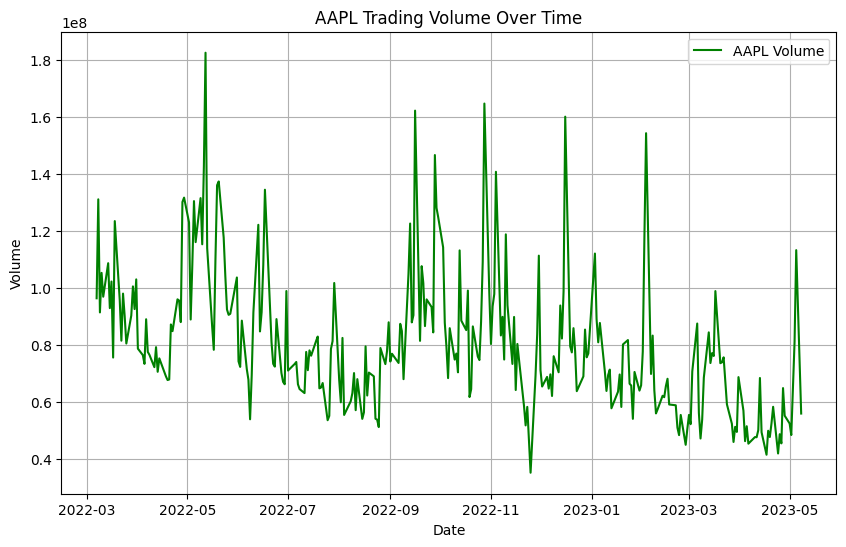

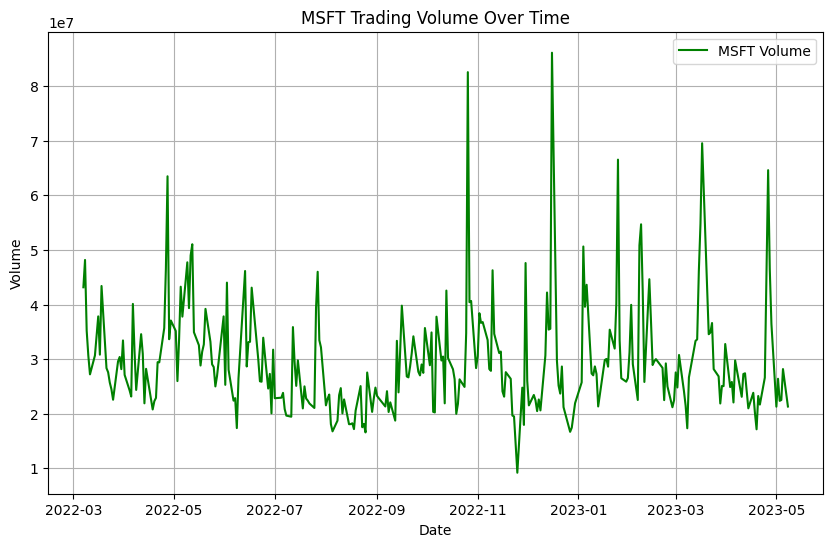

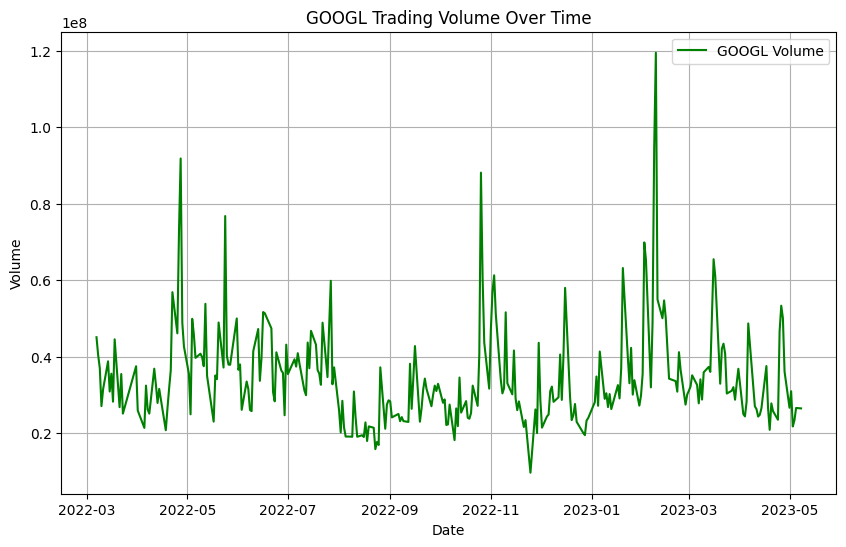

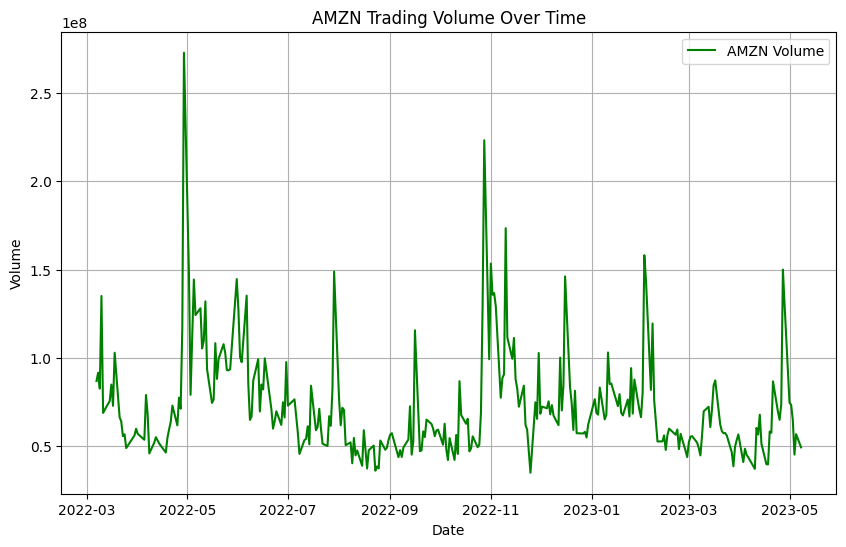

In [ ]:
for ticker in stock_data_dict:
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data_dict[ticker]['Volume'], label=f"{ticker} Volume", color='green')
    plt.title(f"{ticker} Trading Volume Over Time")
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.legend()
    plt.grid()
    plt.show()


* AAPL (Apple): Trading volume exhibits periodic spikes, with the highest activity occurring around mid-2022, indicating events or news driving significant trading activity.

* MSFT (Microsoft): Microsoft's trading volume shows moderate fluctuations, with occasional peaks in late 2022 and early 2023, suggesting intermittent high-interest periods.

* GOOGL (Google): Google's trading volume remains relatively steady, with isolated spikes in early 2023, likely due to specific market events or announcements.

* AMZN (Amazon): Amazon experiences sharp peaks in trading volume, especially in early and late 2022, reflecting heightened market interest during those times.

#**Step 1: Prepare Data for Analysis**

Before applying machine learning or deep learning models, the data needs to be preprocessed.

1. Feature Engineering

Create additional features such as:

Daily returns
Rolling averages
Rolling standard deviation (volatility)
Lagged features (previous days' prices)

In [ ]:
for ticker in stock_data_dict:
    df = stock_data_dict[ticker]
    # Daily return
    df['Daily_Return'] = df['Close'].pct_change()

    # Lag features
    df['Lag_1'] = df['Close'].shift(1)
    df['Lag_2'] = df['Close'].shift(2)
    df['Lag_3'] = df['Close'].shift(3)

    # Rolling volatility (30-day standard deviation)
    df['Rolling_Std_30'] = df['Close'].rolling(window=30).std()

    stock_data_dict[ticker] = df.dropna()  # Drop NaN rows after lag creation


#**Combine Data**

For simplicity, we'll combine the data from all companies into a single dataset for training a machine learning model.

In [ ]:
combined_data = pd.concat([stock_data_dict[ticker] for ticker in stock_data_dict])
combined_data = combined_data.dropna()


#**Define Features and Target**

We will use the lag features (Lag_1, Lag_2, Lag_3) and rolling statistics (Rolling_Std_30) as input features and Daily_Return as the target variable.

In [ ]:
# Define features and target
features = ['Lag_1', 'Lag_2', 'Lag_3', 'Rolling_Std_30']
target = 'Daily_Return'

# Create feature (X) and target (y) datasets
X = combined_data[features]
y = combined_data[target]

print("Feature Data Shape:", X.shape)
print("Target Data Shape:", y.shape)



Feature Data Shape: (1055, 4)
Target Data Shape: (1055,)


#**Step 2 : Train-Test Split**

Split the data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (844, 4)
Testing Set Shape: (211, 4)


#**Step 3: Train a Linear Regression Model**

We will use a simple linear regression model as a baseline to predict Daily_Return.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - R^2 Score: {r2}")


Linear Regression - Mean Squared Error: 0.0004666036872392514
Linear Regression - R^2 Score: -0.012539447319843022


Interpretation:

* **Mean Squared Error** : The MSE value of 0.0004666 indicates the average squared difference between the predicted values and the actual values. While this is relatively small, its significance depends on the scale of your target variable (e.g., daily returns or normalized stock prices).

* **R² Score**: The R² value of -0.0125 suggests that the linear regression model does not fit the data well. In fact, a negative R² indicates that the model is performing worse than a simple horizontal line (mean of the target variable). This suggests that a linear model might not be suitable for capturing the underlying patterns in the stock data.

#**Step 4: Train a Random Forest Regressor**

Random forests are more robust and can handle non-linear relationships effectively.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest - Mean Squared Error: {rf_mse}")
print(f"Random Forest - R^2 Score: {rf_r2}")


Random Forest - Mean Squared Error: 0.0005663713292789938
Random Forest - R^2 Score: -0.22903725026053712


**Interpretation:**

**Mean Squared Error** :The MSE for the Random Forest model (0.0005663) is slightly worse than the Linear Regression model (0.0004666). This suggests that the Random Forest model isn't providing better predictions for this dataset.

**R² Score** : The R² value of -0.2290 indicates that the Random Forest model fits the data even worse than the Linear Regression model. A negative R² suggests that the model is underperforming compared to the baseline (predicting the mean value of the target).

**Possible Causes and Probable future steps:**

**Overfitting or Poor Feature Relevance:** Random Forests can struggle if the features used are not predictive of the target. Review the features and consider adding lagged variables, moving averages, or external indicators like market indices or macroeconomic factors.

**Data Distribution:** Stock data often has non-linear patterns and noise, which can challenge Random Forest models. Preprocessing techniques like feature scaling or transforming the target variable might help.

**Hyperparameter Tuning**:The default Random Forest hyperparameters might not be optimal for your data. Use grid search or randomized search to tune parameters like the number of trees, maximum depth, or minimum samples per split.

**Exploration of Other Models:** Since both Linear Regression and Random Forest show poor performance, consider other models like:

Gradient Boosting (e.g., XGBoost, LightGBM)
Support Vector Machines (SVM)
Neural Networks (e.g., LSTMs for time series data)
Cross-Validation: Perform k-fold cross-validation to ensure the results are consistent across different splits of the data.

The poor performance of both models suggests that the relationships between features and the target variable might be weak or the data itself might not be well-suited for these models in their current form.

Additional data cleaning, feature engineering, or switching to time-series-specific models might help.

#**Step 5: Feature Importance**

Analyze which features contribute the most to the predictions.

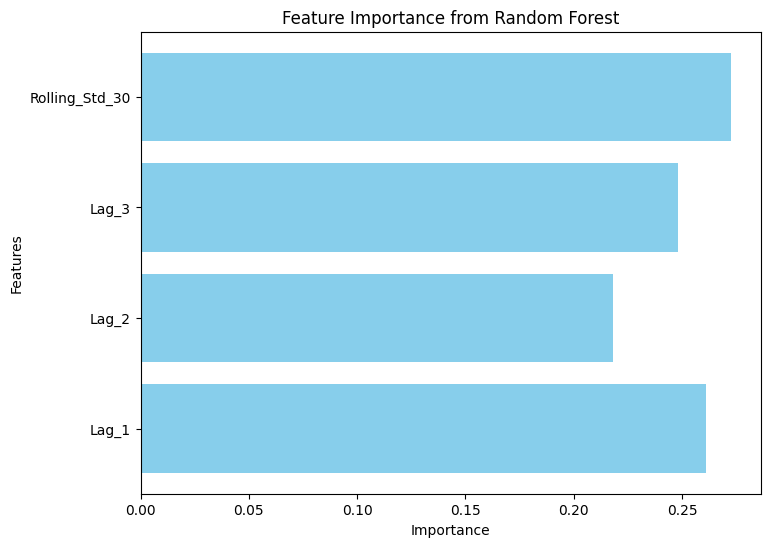

In [ ]:
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


**interpretation of Feature Importance Plot**:

*The Feature Importance plot from the Random Forest model highlights the following insights:*

**Most Important Feature**: The 30-day rolling standard deviation (Rolling_Std_30) has the highest importance, suggesting that volatility plays a significant role in predicting the target variable.

**Lagged Features**: The lag features (Lag_1, Lag_2, and Lag_3) contribute significantly as well. This indicates that the stock price in recent days (up to three days back) influences the prediction.

**Diminishing Influence**: The importance of lagged features decreases as the lag period increases (e.g., Lag_3 is less important than Lag_1), which aligns with the idea that more recent data is more predictive in financial time series.

#**Step 6: Predict Future Returns**

Use the trained random forest model to predict future returns.

In [ ]:
# Predict future returns (on unseen data or test set)
future_returns = rf_model.predict(X_test[:10])  # Example: Predicting the first 10 test samples
print("Predicted Future Returns:", future_returns)


Predicted Future Returns: [ 0.00586803 -0.00799356 -0.00534575 -0.00351694  0.00209036  0.00282993
 -0.00840582 -0.00980528 -0.00290874 -0.00765902]


**Interpretation of Predicted Future Returns**:

The predicted future returns represent the model's estimation of the percentage change in stock price for the upcoming days. Here's what they indicate:

**Mixed Predictions**:

* The predictions include both positive and negative returns, indicating potential gains and losses in the stock price over the next 10 days.
For example, the highest predicted return is 0.0059 (0.59%), while the lowest is -0.0098 (-0.98%).

**Volatility Insight**:

* The small magnitudes of these predictions suggest that the stock is not expected to exhibit dramatic fluctuations in the near term, reflecting relatively stable market conditions.

**Directional Trends**:

* The sequence shows some clustering of negative returns, which might indicate a bearish trend for some days in the forecast horizon.
However, there are also instances of predicted positive returns, suggesting intermittent upward movements.

**Potential Use Cases**:

* Investment Strategy: These predictions could guide short-term investment strategies, such as identifying days with expected positive returns for buying or negative returns for shorting.

**Risk Management**:

* Investors can use this information to hedge against potential losses on days with significant predicted negative returns.

**Limitations**:

* The predictions rely heavily on the model's performance, which might not be very strong (as reflected by earlier low R² scores).

* Further model tuning or feature engineering could improve reliability.

* External factors (e.g., news, market events) not accounted for in the model could significantly impact actual returns.

**Conclusion**

* In this analysis, we explored the historical stock performance of AAPL, MSFT, GOOGL, and AMZN, leveraging data visualization, statistical methods, and machine learning models to gain insights.
* Through various plots, we observed trends in closing prices, daily returns, volatility, and trading volumes.
* Linear regression and random forest models were employed to predict future returns, revealing areas for model improvement and emphasizing the complexity of financial forecasting.
* This project highlighted the value of data-driven analysis in understanding market behavior, while also underscoring the challenges of predicting stock movements accurately.




Dear Professor Yalcin,

I want to take this opportunity to express my heartfelt gratitude for your guidance and support throughout this course. Your enthusiasm for the subject and your ability to break down complex concepts into understandable pieces have truly elevated my learning experience. This project, in particular, allowed me to apply what I’ve learned in a meaningful way, and it wouldn’t have been possible without the foundation you’ve built through your lectures and feedback. You’ve been one of the best professors I’ve had during my academic journey, and your mentorship has been incredibly inspiring. Thank you for making this class a transformative and enjoyable experience!

Best

Shravan Sundar Ravi